### Lasso model selection: Cross-Validation/AIC/BIC

Use the Akaike information criterion(AIC), the Bayes information criterion(BIC) and cross-validation to select an optimal value of the regularization parameter alpha the Lasso estimator.

Results obtained with LassoLarsIC are based on AIC/BIC criteria.

Information-criterion based on model selection is very fast, but it relies on a proper estimation of degrees of freedom, are derived for large smaples(asymptotic results) and assume the model is correct, i.e. that the data are actually generated by this model. They also tend to break when the problem is badly conditioned(more features than samples).

For cross-validation, we use 20-fold with 2 algorithms to compute the Lasso path: coordinate descent, as implemented by the LassoCV class, and Lars(least angle regression) as implemented by the LassoLarsCV class. Both algorithms give roughly the same results. They differ with regards to their execution speed and sources of numercial errors.

Note how the optimal value of alpha varies for each fold. This illustrates why nested cross validation is necessary when trying to evaluate the preformance of a method for which a parameter is chosen by cross-validation: this choice of parameter may not be optimal for unseen data.

C:\Users\libin\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


Computing regularization path using the coordinate descent lasso...
Computing regularization path using the Lars Lasso...


C:\Users\libin\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log10


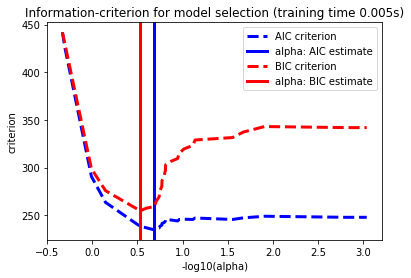

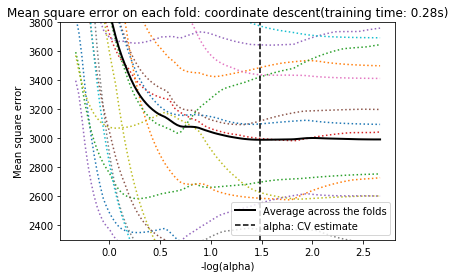

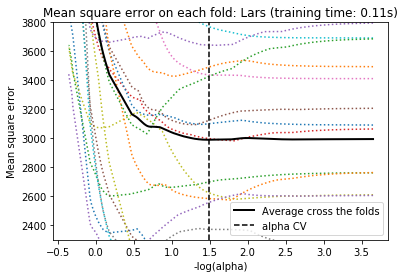

In [5]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets


diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparsion
X /= np.sqrt(np.sum(X ** 2, axis=0))

# LassoLarsIC: least angle regression with BIC/AIC criterion
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic = model_aic.alpha_

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic = model_bic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=3,
             label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log10(alpha)')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

# LassoCV: coordinate descent
print('Computing regularization path using the coordinate descent lasso...')
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# display the results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k', linewidth=2,
         label='Average across the folds',)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent'
          '(training time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

# LassoLarsCV: least angle regression
print('Computing regularization path using the Lars Lasso...')
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# display results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average cross the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.title('Mean square error on each fold: Lars (training time: %.2fs)'
          % t_lasso_lars_cv)

plt.show()
